In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("athlete_events.csv")
region_df = pd.read_csv("noc_regions.csv")

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df.shape, region_df.shape

((271116, 15), (230, 3))

In [6]:
df = df[df['Season'] == 'Summer']

In [7]:
df.shape

(222552, 15)

In [8]:
df = df.merge(region_df,on="NOC",how='left')

In [9]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [10]:
df['region'].nunique()

205

In [11]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [12]:
df.duplicated().sum()

1385

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [16]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [17]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,URS,832.0,635.0,596.0
2,GBR,635.0,729.0,620.0
3,GER,592.0,538.0,649.0
4,ITA,518.0,474.0,454.0
...,...,...,...,...
225,AHO,0.0,1.0,0.0
226,LBR,0.0,0.0,0.0
227,LCA,0.0,0.0,0.0
228,LES,0.0,0.0,0.0


In [18]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [19]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [20]:
medal_tally = medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [21]:
medal_tally[medal_tally['NOC'] == 'IND']

,NOC,Gold,Silver,Bronze
53,IND,9.0,7.0,12.0


In [22]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [23]:
years = df['Year'].unique().tolist()

In [24]:
years.sort()

In [25]:
years.insert(0,'Overall')

In [26]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [27]:
country = np.unique(df['region'].dropna().values).tolist()

In [28]:
country.sort()

In [29]:
country.insert(0,'Overall')

In [30]:
def fetch_medal_tally(year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',
                                                                                      ascending=False).reset_index()

    print(x)

In [31]:
medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [32]:
fetch_medal_tally(year = 'Overall',country='USA')

    Year  Gold  Silver  Bronze
0   1896    11       6       2
1   1900    21      16      17
2   1904    76      79      76
3   1906    12       5       6
4   1908    22      12      12
5   1912    26      18      19
6   1920    41      27      27
7   1924    45      27      27
8   1928    22      18      16
9   1932    44      36      30
10  1936    24      21      12
11  1948    38      27      19
12  1952    40      19      17
13  1956    32      25      17
14  1960    34      21      16
15  1964    36      26      28
16  1968    45      28      34
17  1972    33      31      30
18  1976    34      35      25
19  1984    82      61      30
20  1988    36      31      27
21  1992    37      34      37
22  1996    44      32      25
23  2000    36      24      31
24  2004    36      39      26
25  2008    36      39      35
26  2012    46      28      29
27  2016    46      37      38


OVERALL ANALYSIS

In [33]:
df['Year'].nunique() - 1

28

In [34]:
df['City'].nunique()

23

In [35]:
df['Sport'].nunique()

52

In [36]:
df['Name'].nunique()

116122

In [37]:
df['region'].nunique()

205

In [38]:
nation_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().sort_values('index')

C:\Users\HP\AppData\Local\Temp\ipykernel_23120\3639738311.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  nation_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().sort_values('index')


In [39]:
# #set the index for the series
# nation_over_time.index.name = 'Year'
# nation_over_time.name = 'Nation'

In [40]:
nation_over_time = pd.DataFrame(nation_over_time)

In [41]:
nation_over_time.rename(columns={"index":'Edition','Year':'No of Countries'},inplace=True)

In [42]:
nation_over_time

,No of Countries
1896,12
1904,14
1906,20
1908,22
1912,29
1920,29
1900,31
1924,45
1928,46
1932,47


In [43]:
import plotly.express as px

In [44]:
fig = px.line(nation_over_time, y ="No of Countries")
fig.show()

In [45]:
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('index')

,index,Year
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [46]:
x = df.drop_duplicates(['Year','Sport','Event'])

<AxesSubplot:xlabel='Year', ylabel='Sport'>

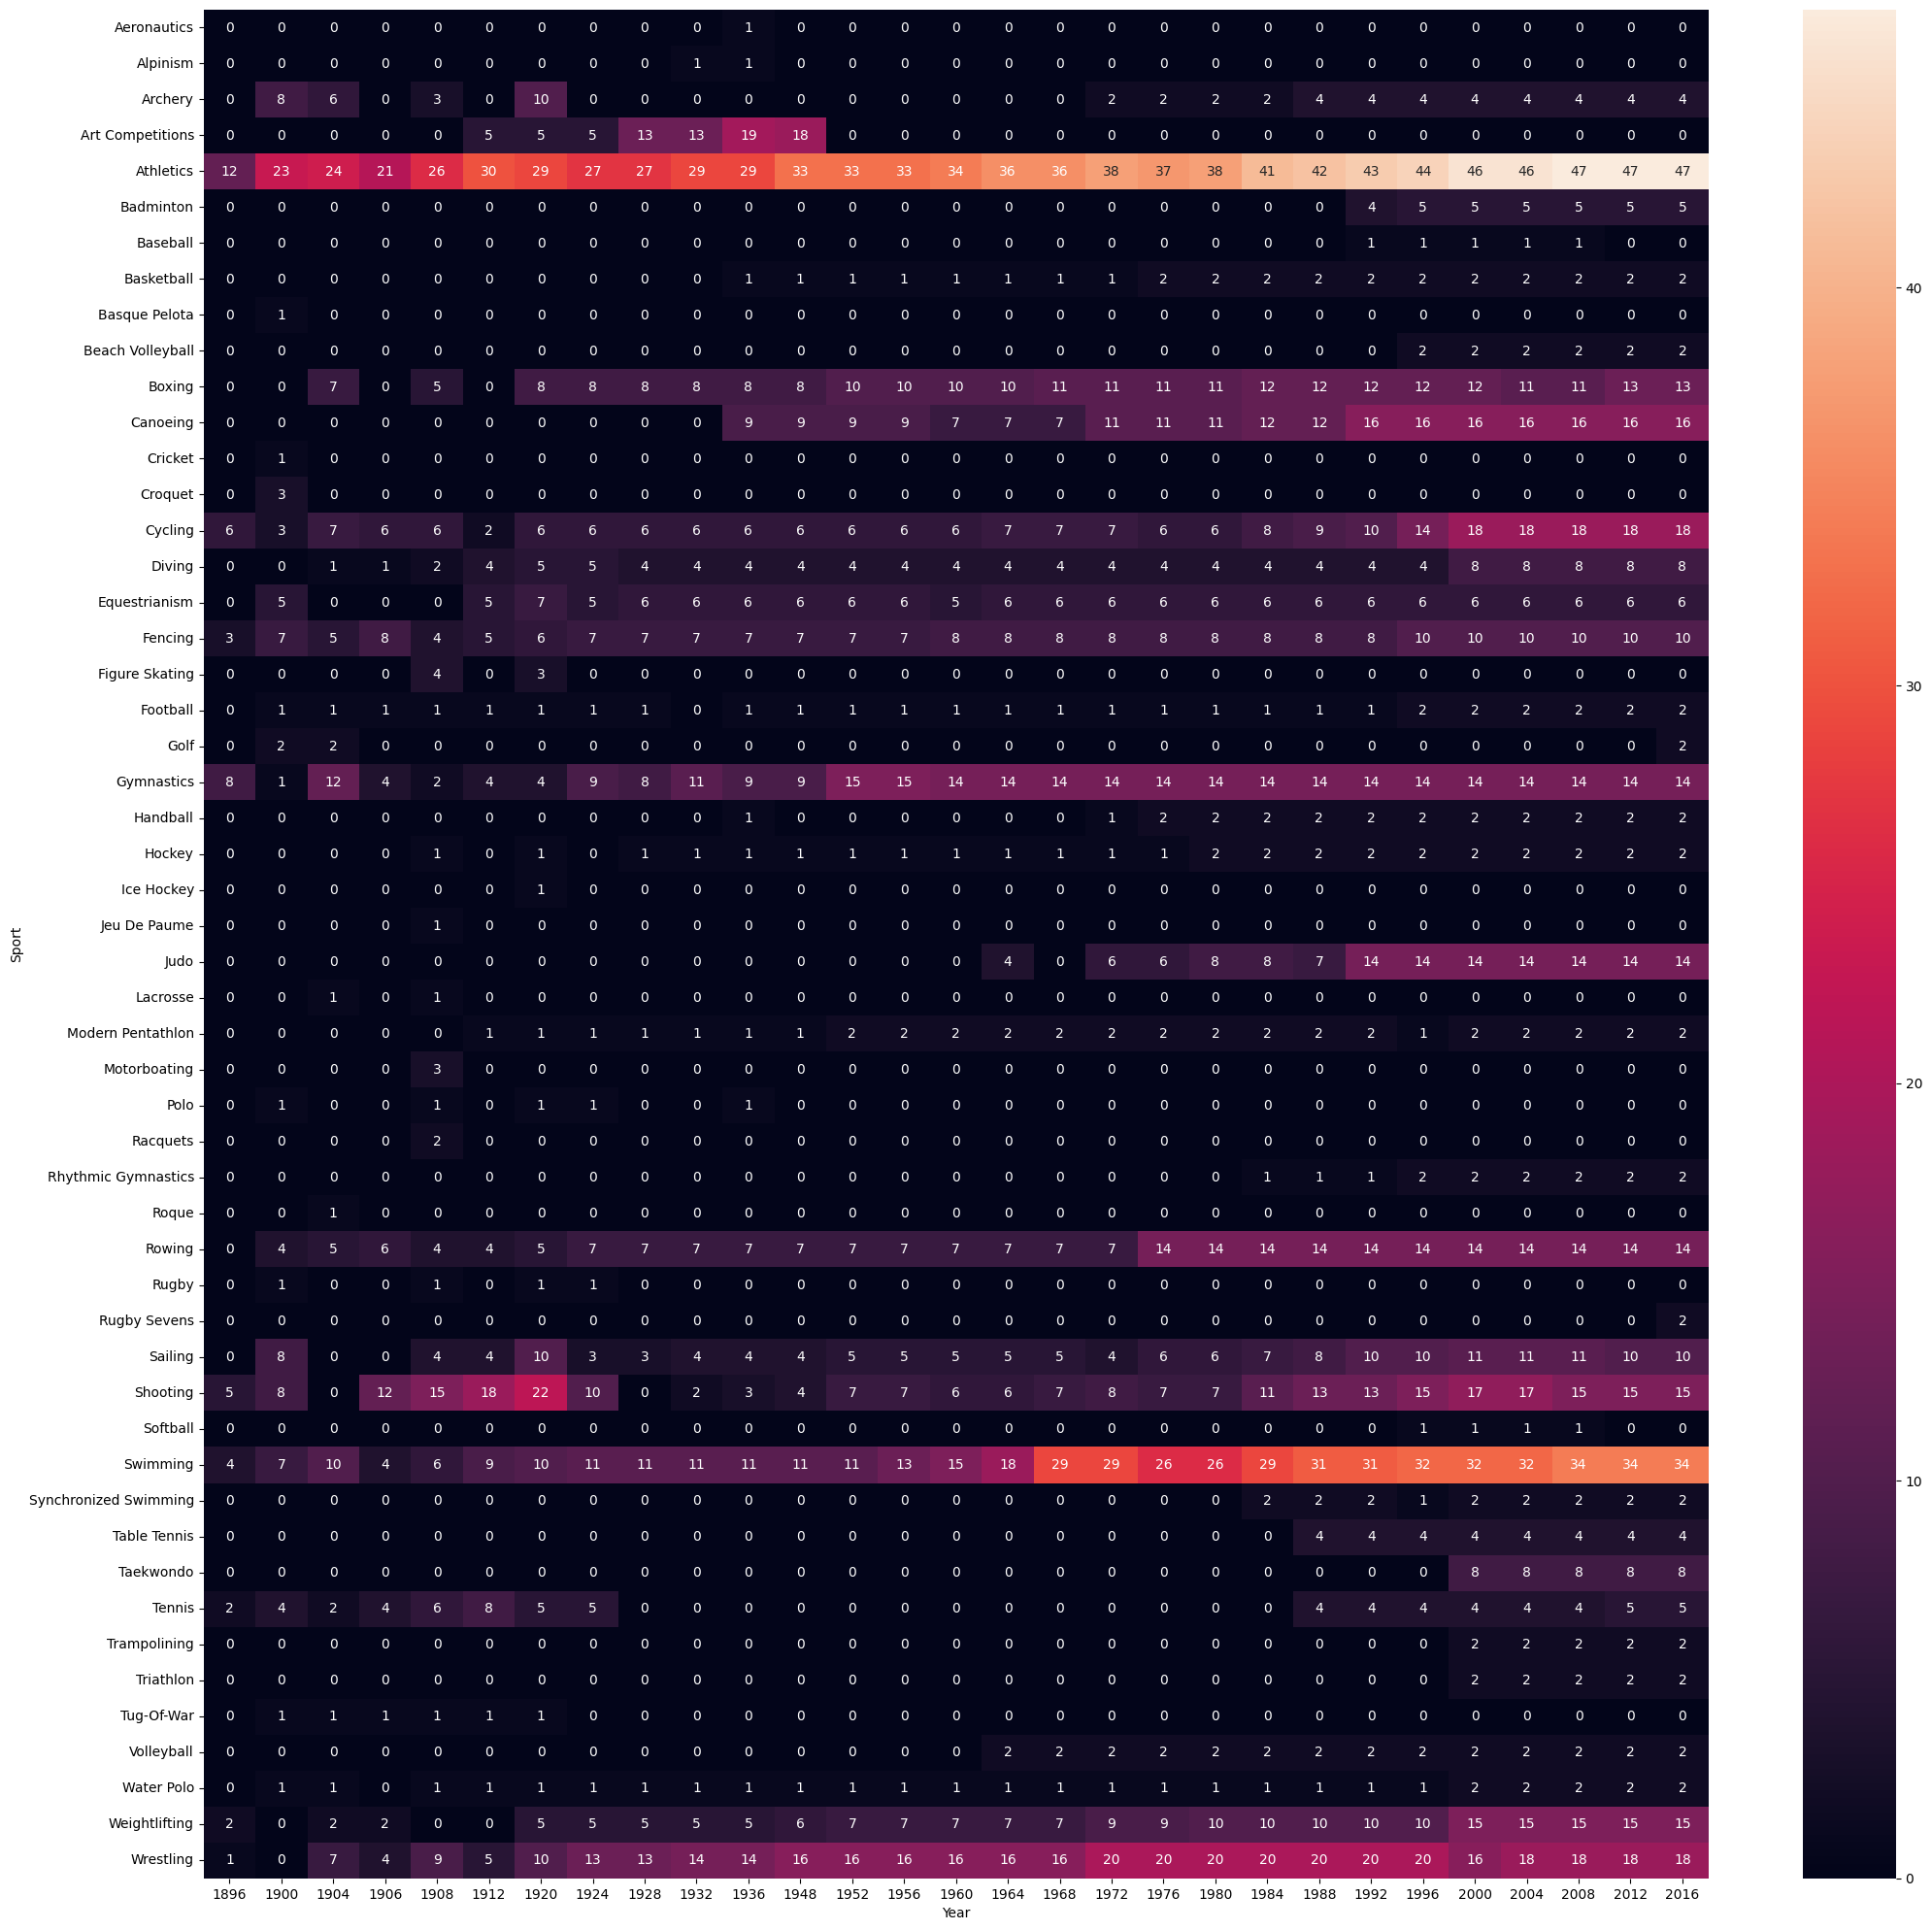

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [48]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index', right_on='Name', how='left')[
        ['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return x

In [49]:
most_successful(df,'Overall')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
195,Birgit Fischer-Schmidt,12,Canoeing,Germany


Country-wise-analysis

In [50]:
temp_df = df.dropna(subset=['Medal'])

In [51]:
temp_df.drop_duplicates(subset=['Team','NOC','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23120\3032344738.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
new_df = temp_df[temp_df['region'] == 'USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [53]:
fig = px.line(final_df, x='Year',y="Medal")
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Sport'>

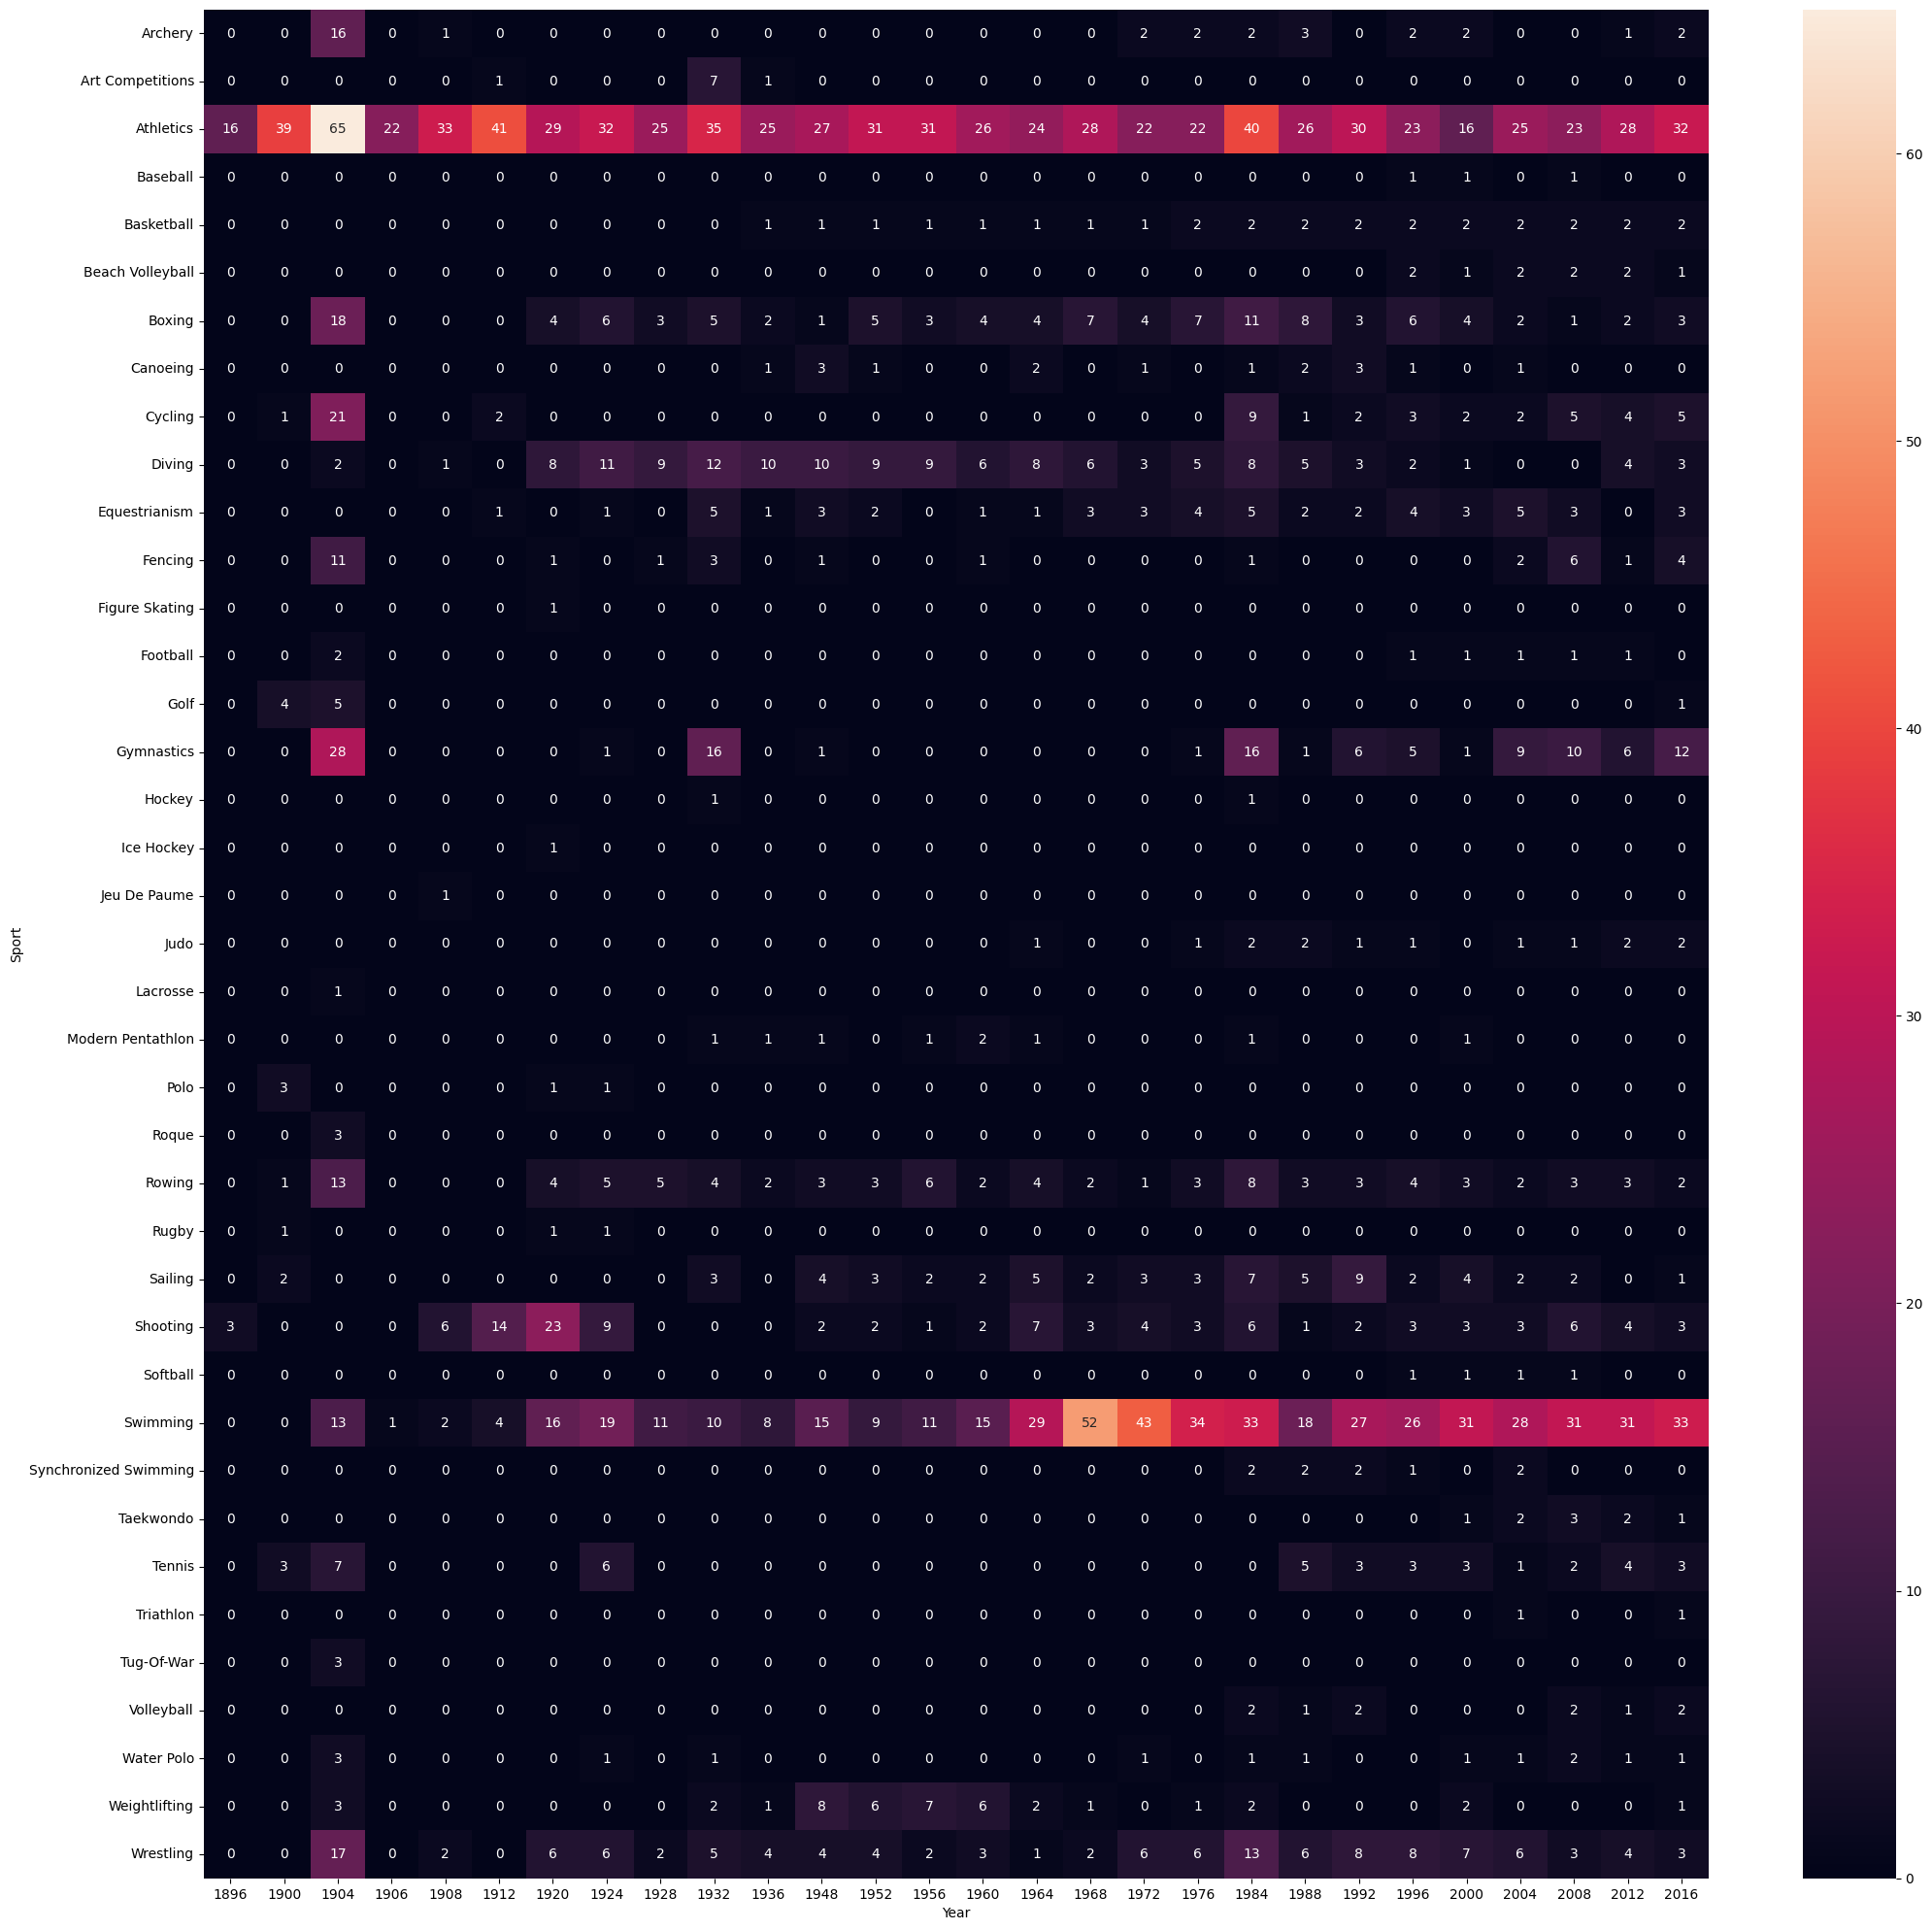

In [54]:
new_df = temp_df[temp_df['region'] == 'USA']
plt.figure(figsize=(25,25))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values="Medal",aggfunc='count').fillna(0),annot=True)

In [55]:
final_df

,Year,Medal
0,1896,19
1,1900,54
2,1904,231
3,1906,23
4,1908,46
5,1912,63
6,1920,95
7,1924,99
8,1928,56
9,1932,110


In [56]:
def most_successful(df, country):
    temp_df = df.dropna(subset=['Medal'])

    temp_df = temp_df[temp_df['region'] == country]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index', right_on='Name', how='left')[
        ['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return x

In [57]:
most_successful(df,'Jamaica')

,Name,Medals,Sport,region
0,Merlene Joyce Ottey-Page,9,Athletics,Jamaica
19,Veronica Angella Campbell-Brown,8,Athletics,Jamaica
30,Usain St. Leo Bolt,8,Athletics,Jamaica
40,Shelly-Ann Fraser-Pryce,6,Athletics,Jamaica
47,"Donald O'Reilly ""Don"" Quarrie",4,Athletics,Jamaica
56,"Herbert Henry ""Herb"" McKenley",4,Athletics,Jamaica
62,Arthur Stanley Wint,4,Athletics,Jamaica
68,Novlene Hilaire Williams-Mills,4,Athletics,Jamaica
75,Yohan Blake,4,Athletics,Jamaica
81,Sherone Anmarica Simpson,3,Athletics,Jamaica


In [58]:
import plotly.figure_factory as ff

In [59]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [60]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])

x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'],show_hist=False, show_rug=False)
fig.show()


In [61]:
athlete_df['Medal'].fillna("No Medal",inplace=True)

<AxesSubplot:xlabel='Weight', ylabel='Height'>

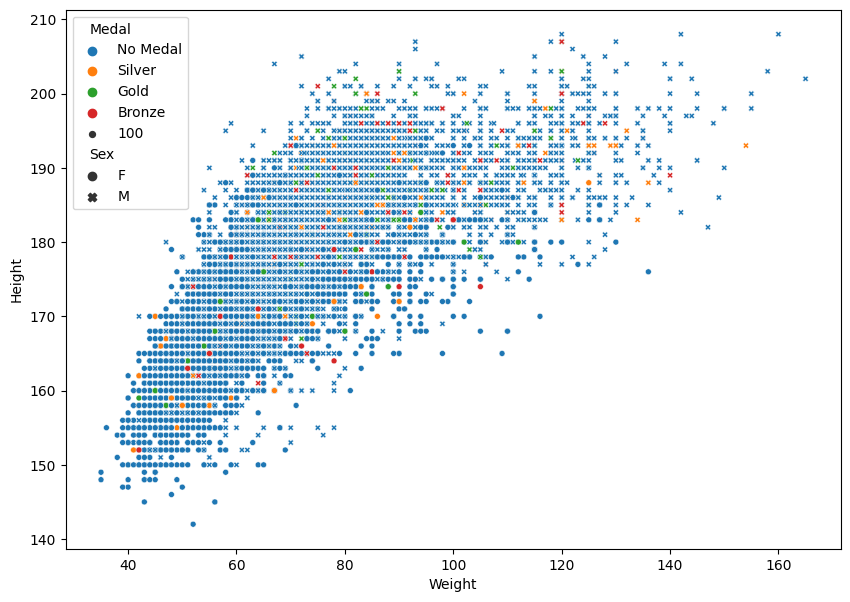

In [69]:
plt.figure(figsize=(10,7))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(x = athlete_df['Weight'], y = athlete_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],size=100)

In [70]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [77]:
final = men.merge(women,on='Year',how="left")
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)

In [78]:
final.fillna(0,inplace=True)

In [79]:
fig = px.line(final,x='Year',y=['Male','Female'])
fig.show()